In [17]:
# Utils
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import time
#import _pickle as pickle
import pickle
import re, sys, unidecode
#import unidecode

from sklearn.metrics import accuracy_score
from IPython.display import display, Markdown, Latex

import shutil
import os

# Representation
import nltk
from nltk.corpus import stopwords
import scikitplot as skplt

import wordbatch
from wordbatch.extractors import WordBag, WordHash
from wordbatch.models import FTRL

from tensorflow.contrib.learn import DNNClassifier

#from tecnosmartlib import DataObject

/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so | _pywrap_tensorflow_internal
/root/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/lite/toco/python/_tensorflow_wrap_toco.so | _tensorflow_wrap_toco


In [9]:
#plt.style.use('fivethirtyeight')
#Carga stop word
nltk.download('stopwords')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# punkt:  módulo contiene modelos para la tokenización de textos
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Parameters

In [14]:

path_model = './tmp10'

try:
    os.system("rm -rf "+path_model)
    os.system("mkdir "+path_model)
except:
    print("error")

# Load Data

In [21]:
dfNoticias = pd.read_pickle("../data/raw/dfNoticias")

# pre procesing and cleaning

Cleaning data, select clases

In [38]:
from bs4 import BeautifulSoup
import nltk
import os, sys, re, time, gc, types, string, unicodedata, unidecode, string, warnings, inspect


def normalize_text(text):
    """ Funcion de normalizacion """
    
    # Get plain text from HTML
    soup = BeautifulSoup(text, 'html.parser')
    
    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out    
    
    # get text
    text = soup.get_text()
    return text        
    # break into lines and remove leading and trailing space on each
    #lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    #chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blan
    #k lines
    #text = '\n'.join(chunk for chunk in chunks if chunk)
    
#     # split into words
#     tokens = nltk.tokenize.word_tokenize(text,language='spanish', preserve_line=False)
#     # convert to lower case
#     tokens = [w.lower() for w in tokens]    
    
#     # remove punctuation from each word
#     table = str.maketrans('', '', string.punctuation)
#     stripped = [w.translate(table) for w in tokens]
    
#     # remove remaining tokens that are n<<<<<<<<<<<<<<<<<<<<<
#     words = [word for word in stripped if word.isalpha()]
    
#     # stop word and remove accent
#     def strip_accents(s):
#         return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
#     stop_words = set(spanish_stopwords)
#     words = [strip_accents(w) for w in words if not w in stop_words]
    
#     return u" ".join(words)


In [40]:
start = time.time()
normalize_text('\n<p>Por problemas de agenda de la jueza del <strong>Tribunal de Garantía de Temuco</strong> que encabeza la <strong>preparación de juicio oral contra el machi Celestino Córdova </strong>-imputado por <a href="/noticias/pais/region-de-la-araucania/incendio-intencional-destruyo-casa-de-la-familia-luchsinger-en-vilcun/2013-01-04/062322.html" target="_blank">ataque incendiario que terminó con la vida del matrimonio Luchsinger-Mackay</a>-\xa0se debió postergar la audiencia para el próximo lunes 2 de diciembre.</p>\n<p>Esta situación <strong>causó malestar tanto en el Ministerio Público como entre los querellantes</strong>, <a href="/noticias/pais/region-de-la-araucania/caso-luchsinger-vuelven-a-postergar-audiencia-contra-celestino-cordova/2013-11-06/161047.html" target="_blank">debido a las sucesivas postergaciones</a> que ha tenido este procedimiento, el cual se esperaba que no durara más de una semana y el que, paulatinamente, se ha ido postergando.</p>\n<p>La <strong>abogada Karina Riquelme</strong>, en representación de la defensa del machi, indicó que esta postergación <strong>sirve para demostrar la inocencia del imputado</strong> y que "estamos realizando todas las pericias correspondientes para poder probar los antecedentes que he expuesto".</p>\n<p>Hasta el momento, la Fiscalía <a href="/noticias/pais/region-de-la-araucania/caso-luchsinger-mackay-fiscalia-logro-acreditar-37-testigos/2013-11-04/163156.html" target="_blank">es la única que ha podido acreditar a cerca de 40 peritos y testigos</a> para el juicio oral, el que ahora -debido a esta nueva postergación- se realizaría a principios del próximo año.</p>\n')
end = time.time()-start
print(end)

0.004897594451904297


In [47]:
dfNoticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250759 entries, 1 to 389889
Data columns (total 16 columns):
Cuerpo       250639 non-null object
Fecha        250759 non-null object
Hora         250759 non-null object
ID           250759 non-null object
Resumen      249632 non-null object
Seccion_1    250459 non-null object
Seccion_2    123240 non-null object
Seccion_3    37532 non-null object
Subtema_1    182753 non-null object
Subtema_2    74385 non-null object
Subtema_3    24247 non-null object
Tema_1       248508 non-null object
Tema_2       116973 non-null object
Tema_3       36153 non-null object
Titular      250759 non-null object
Type         250759 non-null object
dtypes: object(16)
memory usage: 32.5+ MB


In [50]:
dfNoticias.iloc[1]["Resumen"]

'\nLas conversaciones comenzaron el año 2010 y no dieron fruto durante la administración Piñera.\nMichelle Bachelet analiza el tema, pero no lo tiene como "prioridad".\n'

'\nEl Gobierno de\xa0Barack Obama ha enviado\xa0cuatro solicitudes a Chile desde el año 2010 para que reciba a presos de la cárcel de Guantánamo, ubicada en Cuba.\nSegún recuerda este lunes el diario La Tercera, el primer acercamiento que tuvo la Casa Blanca con La Moneda en relación con esta materia fue durante el primer año de Gobierno de Sebastián Piñera.\nLa petición se basó principalmente en el envío de dos personas pertenecientes a un grupo étnico de China que fueron encerradas en Guantánamo por enfrentarse con el gobierno asiátic, "cargos que nunca fueron comprobados por la justicia norteamericana".\nDurante el 2012 existieron nuevos intercambios verbales, "pero, al igual que las conversaciones que se efectuaron dos años antes, no arrojaron resultados positivos para la Casa Blanca. En esa oportunidad los prisioneros fueron enviados a otros países".\nLa tercera solicitud se realizó en los últimos meses de la administración de Piñera. "A diferencia de las otras peticiones, esta se

In [42]:
print('Selecting useful information...', end='')
_map = {}
_map["Cuerpo"] = []
_map["Seccion"] = []
_map["Subtema"] = []


count = 0
for index, row in dfNoticias.iterrows():
    if (row["Seccion_1"] != None and row["Cuerpo"] != None):
        _map["Cuerpo"].append(normalize_text(row["Cuerpo"])) 
        _map["Seccion"].append(row["Seccion_1"])
        _map["Subtema"].append(row["Subtema_1"])
print('done.')



Selecting useful information...done.


In [ ]:
dfNoticias.head

In [6]:
df = pd.DataFrame(_map)

numberOfDuplicates = df.shape[0]
print('Number of data before dropping duplicates: {}'.format(df.shape[0]))
df = df.drop_duplicates(inplace= False)
df.reset_index(drop=True, inplace= True)
numberOfDuplicates -= df.shape[0]
print('Number of data after dropping duplicates : {}'.format(df.shape[0]))
print('\nNumber of duplicated data : {}'.format(numberOfDuplicates))



Number of data before dropping duplicates: 250339
Number of data after dropping duplicates : 238909

Number of duplicated data : 11430


In [7]:
X_untransformed = df['Cuerpo'].reset_index(drop=True)
y_untransformed = df['Seccion'].reset_index(drop=True)

def remove_accents(a):
    return unidecode.unidecode(a)

y = y_untransformed.apply(remove_accents)
y = y.values

# Feature Extraccion

### Data representation

TFID calculation

In [8]:
calc_tfid = False
save_file = "tfid_features_hash20.p"

if calc_tfid :
    start = time.time()
    print("start")


    spanish_stopwords = stopwords.words('spanish')
    def normalize_text(text):
        return u" ".join([x for x in [y for y in text.lower().strip().split(" ")] 
                          if len(x) > 1 and x not in spanish_stopwords])

    X_untransformed = X_untransformed
    n_docs = X_untransformed.shape[0]
    n_cpu = 20

    batch_size = int(n_docs/n_cpu)

    #'log', "idf":50.0
    wb = wordbatch.WordBatch(normalize_text, 
                             extractor=(WordBag, {"hash_ngrams": 1, "hash_ngrams_weights": [1.0, 1.0],
                                                  "hash_size": 2**20, "norm": "l2", "tf": 1.0,
                                                  "idf": 1.0}), procs=n_cpu, n_words=1000, minibatch_size=batch_size)
    wb.dictionary_freeze = True
    word_comment = wb.fit_transform(list(X_untransformed),reset= False)
    X_transformed = word_comment[:, np.array(np.clip(word_comment.getnnz(axis=0) - 1, 0, 1), dtype = bool)]

    end = time.time()
    print("TFIDF end time :" + str(end - start) )


    X = X_transformed


    #X = X.todense()
    print('Number of features: {}'.format(X.shape[1]))

    pickle.dump( X, open( save_file, "wb" ) )
else:    
    X = pickle.load( open( save_file, "rb" ) )

### filter clases

In [9]:
labels = list(set(y))
umbral = 100
sizes = [ [label,y[y== label].shape[0]] for label in labels ]
filter_sizes = list(filter(lambda x:x[1]>umbral ,sizes ))
names_clases = set( map(lambda x:x[0], filter_sizes ) )

index = list(map(lambda x: {x}.issubset(names_clases), y ))

y = y[index]
X = X[np.nonzero(index)]


### Output

In [10]:
np.random.seed(42)

train_fraction = 0.8

train_indices = np.random.choice(X.shape[0], round(train_fraction*X.shape[0]), replace=False)
test_indices = np.array(list(set(range(X.shape[0])) - set(train_indices)))

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [11]:
labels = list(set(y))
nClasses = len(labels)

# lerko
scale_factor = 10e3
sizes = {label: y_train[y_train == label].shape[0] for label in labels}
weights = np.asarray([scale_factor/sizes[label] for label in y])

# sizes = {label: y_train[y_train == label].shape[0] for label in labels}
# weights = np.asarray([len(y_train)/(sizes[label]*nClasses) for label in y])

weights = weights[:,np.newaxis]
weights_train = weights[train_indices]
weights_test = weights[test_indices]


# Model

### DNN graph generation

In [12]:
len(y_train)

191062

In [13]:
epochs = 14000

# Define the test inputs
def get_train_inputs():    
    dataset = tf.estimator.inputs.numpy_input_fn({'x': X_train.todense(),'class_weights': weights_train},
                                                  y_train[:,np.newaxis],
                                                  shuffle=True,
                                                  batch_size=500,
                                                  num_epochs=epochs)
    return dataset

def get_test_inputs():
    dataset = tf.estimator.inputs.numpy_input_fn({'x': X_test.todense(),'class_weights': weights_test},
                                                  y_test[:,np.newaxis],
                                                  shuffle=False)
    return dataset

### functions graph tensorflow

In [14]:


tf.set_random_seed(42)

feature_columns = [tf.contrib.layers.real_valued_column('x', dimension=1000)]

classifier = DNNClassifier(                                
                           n_classes=len(labels), label_keys=labels, feature_columns=feature_columns,
                           hidden_units=[2000, 1000, 100],
                           dropout=0.5,
                           weight_column_name='class_weights',
                           model_dir = path_model,
                           config = tf.contrib.learn.RunConfig(save_checkpoints_steps = 500,
                           save_checkpoints_secs = None)                           
                          )

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4b329236d8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': None, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': 500, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './tmp10'}


# Training



In [15]:

    
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    #input_fn= get_train_inputs(),
    input_fn= get_test_inputs(),
    
    every_n_steps=500,
    #early_stopping_metric="accuracy",#loss
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=2000)

start = time.time()
print("start")

#classifier.fit(input_fn=get_train_inputs(), monitors=[validation_monitor], steps=epochs, max_steps=None)
classifier.fit(input_fn=get_train_inputs(), monitors=[validation_monitor], steps=epochs, max_steps=None)

end = time.time()
print("Training time :" + str(end - start) )


Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
start
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./tmp10/model.ckpt.
INFO:tensorflow:loss = 0.84173393, step = 1
INFO:tensorflow:global_step/sec: 22.8641
INFO:tensorflow:loss = 0.96353453, step = 101 (4.376 sec)
INFO:tensorflow:global_step/sec: 23.4301
INFO:tensorflow:loss = 0.8389761, step = 201 (4.270 sec)
INFO:tensorflow:global_step/sec: 23.5222
INFO:tensorflow:loss = 0.8106085, step = 301 (4.251 sec)
INFO:tensorflow:global_step/sec: 24.0835
INFO:tensorflow:loss = 0.81804836, step = 401 (4.152 sec)
INFO:tensorflow:Starting evaluation at 2018-08-29-20:34:42
INFO:tensorflow:Restoring parameters from ./tmp10/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2018-08-29-20:34:46
INFO:tensorflow:Saving dict for global step 1: accuracy = 0.12714045, global_step = 1, loss = 2.0791414
INFO:tensorflow:Validation (step 500): loss = 2.0791414, accuracy = 0.127

INFO:tensorflow:global_step/sec: 23.0287
INFO:tensorflow:loss = 0.23677096, step = 4201 (4.343 sec)
INFO:tensorflow:global_step/sec: 22.7744
INFO:tensorflow:loss = 0.3608305, step = 4301 (4.391 sec)
INFO:tensorflow:global_step/sec: 22.9818
INFO:tensorflow:loss = 0.42772946, step = 4401 (4.351 sec)
INFO:tensorflow:Starting evaluation at 2018-08-29-20:38:13
INFO:tensorflow:Restoring parameters from ./tmp10/model.ckpt-4001
INFO:tensorflow:Finished evaluation at 2018-08-29-20:38:17
INFO:tensorflow:Saving dict for global step 4001: accuracy = 0.7581858, global_step = 4001, loss = 0.70343167
INFO:tensorflow:Validation (step 4500): loss = 0.70343167, accuracy = 0.7581858, global_step = 4001
INFO:tensorflow:Saving checkpoints for 4501 into ./tmp10/model.ckpt.
INFO:tensorflow:global_step/sec: 10.3609
INFO:tensorflow:loss = 0.29208043, step = 4501 (9.656 sec)
INFO:tensorflow:global_step/sec: 23.1601
INFO:tensorflow:loss = 0.30496258, step = 4601 (4.313 sec)
INFO:tensorflow:global_step/sec: 23.63

INFO:tensorflow:Validation (step 8500): loss = 0.6798925, accuracy = 0.767451, global_step = 8001
INFO:tensorflow:Saving checkpoints for 8501 into ./tmp10/model.ckpt.
INFO:tensorflow:global_step/sec: 11.3054
INFO:tensorflow:loss = 0.2456361, step = 8501 (8.848 sec)
INFO:tensorflow:global_step/sec: 24.0229
INFO:tensorflow:loss = 0.2514162, step = 8601 (4.160 sec)
INFO:tensorflow:global_step/sec: 23.5689
INFO:tensorflow:loss = 0.28371418, step = 8701 (4.244 sec)
INFO:tensorflow:global_step/sec: 21.091
INFO:tensorflow:loss = 0.26184332, step = 8801 (4.742 sec)
INFO:tensorflow:global_step/sec: 19.9095
INFO:tensorflow:loss = 0.21149644, step = 8901 (5.021 sec)
INFO:tensorflow:Starting evaluation at 2018-08-29-20:42:09
INFO:tensorflow:Restoring parameters from ./tmp10/model.ckpt-8501
INFO:tensorflow:Finished evaluation at 2018-08-29-20:42:14
INFO:tensorflow:Saving dict for global step 8501: accuracy = 0.77091044, global_step = 8501, loss = 0.6676922
INFO:tensorflow:Validation (step 9000): lo

# Evaluation performance


INFO:tensorflow:Restoring parameters from ./tmp10/model.ckpt-11000


/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


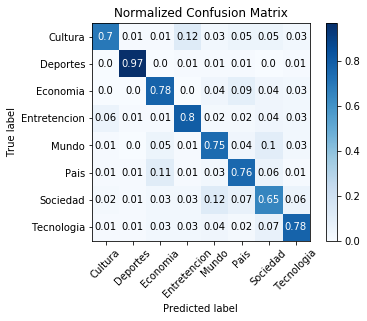

## Accuracy in test: 82.64000837433268 

In [16]:
def input_fn_evaluate():
    dataset = {'x': tf.constant(X_test.todense())}    
    return dataset

pred_test = classifier.predict_classes(input_fn=input_fn_evaluate)
y_test_hat = np.asarray([x.decode('UTF-8') for x in list(pred_test)])
y_test_hat = y_test_hat.astype(str)


acc = accuracy_score(y_true=y_test, y_pred=y_test_hat)

skplt.metrics.plot_confusion_matrix(y_test, y_test_hat,normalize=True)
plt.xticks(rotation=45)
plt.show()

#print('Accuracy in test: {}'.format(acc))
display(Markdown('## Accuracy in test: {} '.format(acc*100)))

In [17]:
# from numba import cuda


In [18]:
# cuda.select_device(0)
# cuda.close()


In [19]:
# tf.Session.close()

TypeError: close() missing 1 required positional argument: 'self'

In [ ]:
# classifier._session.close()

In [ ]:
# tf.Session()